In [122]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [123]:
df=pd.read_csv('Customer-Churn(noML).csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Customer-Churn(noML).csv'

In [ ]:
df=df.drop('Unnamed: 0', axis=1)

# 1. Train and Evaluate model

In [ ]:
X=df.drop('Churn', axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,3,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
#Split the data into training set (80%) and test set (20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


### 1. Logistic Regression Model

In [ ]:
#fit Logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)
#predict the value for new, unseen data
y_log_pred = logmodel.predict(X_test)

In [ ]:
#find Accuracy using accuracy_score and f1_score method
log_accuracy = round(metrics.accuracy_score(y_test, y_log_pred) * 100, 2)
log_f1 = round(metrics.f1_score(y_test, y_log_pred) * 100, 2)

### 2. Random Forest Model

In [ ]:
#fit Logistic Regression Model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfmodel.fit(X_train,y_train)
#predict the value for new, unseen data
y_rf_pred = rfmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1068
           1       0.66      0.74      0.70       339

    accuracy                           0.85      1407
   macro avg       0.79      0.81      0.80      1407
weighted avg       0.85      0.85      0.85      1407



In [ ]:
#find Accuracy using accuracy_score and f1_score method
rf_accuracy = round(metrics.accuracy_score(y_test, y_rf_pred) * 100, 2)
rf_f1 = round(metrics.f1_score(y_test, y_rf_pred) * 100, 2)


### 3. Decision Tree Classifier

In [ ]:
#fit Logistic Regression Model
dtmodel = DecisionTreeClassifier(criterion='gini', random_state=50)
dtmodel.fit(X_train,y_train)
#predict the value for new, unseen data
y_dt_pred = dtmodel.predict(X_test)

In [ ]:
#find Accuracy using accuracy_score and f1_score method
dt_accuracy = round(metrics.accuracy_score(y_test, y_dt_pred) * 100, 2)
dt_f1 = round(metrics.f1_score(y_test, y_dt_pred) * 100, 2)


### 4. Compare models according to Accuracy and F1 scores

This section compares performance of different classification models to choose the best one for further tuning. After splitting the dataset in training and testing sets, applied following methods to predict customer churn.

Model’s performance was evaluated on two main metrics accuracy and f1-score. Accuracy measures model’s ability to predict the correct class for a given input, however in cases of imbalanced datasets this metric can be misleading as the model will predict the most common class. For this reason, we used f1-score. Thus focusing in high value of f1-score will yield in better results. Results summarized in table below.

In [ ]:
model_comparison = pd.DataFrame({
  
   'Accuracy score': [log_accuracy, rf_accuracy, dt_accuracy],
   'F1 score': [log_f1, rf_f1, dt_f1],
   'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree']

   })
model_comparison_df = model_comparison.sort_values(by='F1 score', ascending=False)
model_comparison_df = model_comparison_df.set_index('F1 score')
model_comparison_df.reset_index()

,F1 score,Accuracy score,Model
0,71.35,84.93,Logistic Regression
1,70.00,84.65,Random Forest
2,65.81,81.02,Decision Tree


- The model with highest accuracy and f1 scores is Logistic Regression.

### 5. Handling imbalanced data

After decided to use Logistic Regression model to predict churn customers, we can see F1 score in this particular model is still low. Moving ahead to use oversampling method and SMOTE techniqure to solve this problem.

In [ ]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
#fit Logistic Regression Model
logmodel_smote = LogisticRegression(random_state=50)
logmodel_smote.fit(xr_train,yr_train)
#predict the value for new, unseen data
yr_log_pred = logmodel_smote.predict(xr_test)
#find Accuracy using accuracy_score and f1_score method
log_smote_accuracy = round(metrics.accuracy_score(yr_test, yr_log_pred) * 100, 2)
print(log_smote_accuracy)

88.87


In [ ]:
log_smote_f1 = round(metrics.f1_score(yr_test, yr_log_pred) * 100, 2)
print(log_smote_f1)

88.79


- Now we can see quite better results, i.e. Accuracy: 88.87 %, and a f1 score: 88.79% (compared to 71.35% before) for minority class.

# 2. Predict probability of Churn of each customer

In [ ]:
df['Probability_of_Churn'] = logmodel_smote.predict_proba(df[xr_test.columns])[:,1]

In [ ]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Probability_of_Churn
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0.571595
1,0,56.95,1889.50,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0.006534
2,0,53.85,108.15,0,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0.329980
3,0,42.30,1840.75,0,3,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0.296894
4,0,70.70,151.65,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0.937888


In [ ]:
#df.to_csv('Customer-Churn-prediction.csv')

# 3. Which feature affects the most on customer churn decision?

Coefficient Magnitude: In logistic regression, the coefficients represent the relationship between each feature and the logarithm of the odds of the target variable. The magnitude of these coefficients indicates the strength of the association between each feature and the target. Larger coefficient magnitudes suggest a stronger impact on the prediction. Positive coefficients indicate a positive relationship with the target variable, while negative coefficients indicate a negative relationship.

In [ ]:
#create a series with feature importance
importance = logmodel_smote.coef_[0]
importance

array([-9.86187600e-02,  6.20134335e-02, -8.40549895e-04,  4.57373327e-03,
        1.58233846e+00, -6.84507811e-01, -8.40347503e-01, -5.34028424e-01,
       -8.04331983e-01, -1.71725580e-01, -7.55156842e-01,  1.04964104e-01,
       -2.30896506e-01, -7.47681328e-01,  1.04964104e-01, -4.73580043e-01,
       -2.14926207e-01, -6.61794730e-02, -6.33701044e-02,  1.52709888e-01,
       -6.33701044e-02, -9.86937562e-01, -1.39058420e-01, -6.33701044e-02,
       -9.03983981e-01, -1.61194779e-01, -6.33701044e-02, -8.39120948e-01,
       -4.08586884e-02, -6.33701044e-02, -9.27187335e-01, -1.99571859e-01,
       -6.33701044e-02, -7.52674292e-01, -1.13558421e-01, -6.33701044e-02,
       -7.51233827e-01,  9.76253319e-01, -6.20368144e-01, -8.48279363e-01,
       -9.10772461e-01, -2.51000347e-01, -6.61580180e-01, -8.08952000e-01,
       -2.53914462e-01, -4.59368909e-01,  6.05911016e-01, -3.26794797e-01,
       -2.35457378e-01, -5.29400941e-02, -2.23080762e-01, -3.00808869e-01])

Text(0.5, 1.0, 'Logistic Regression important features')

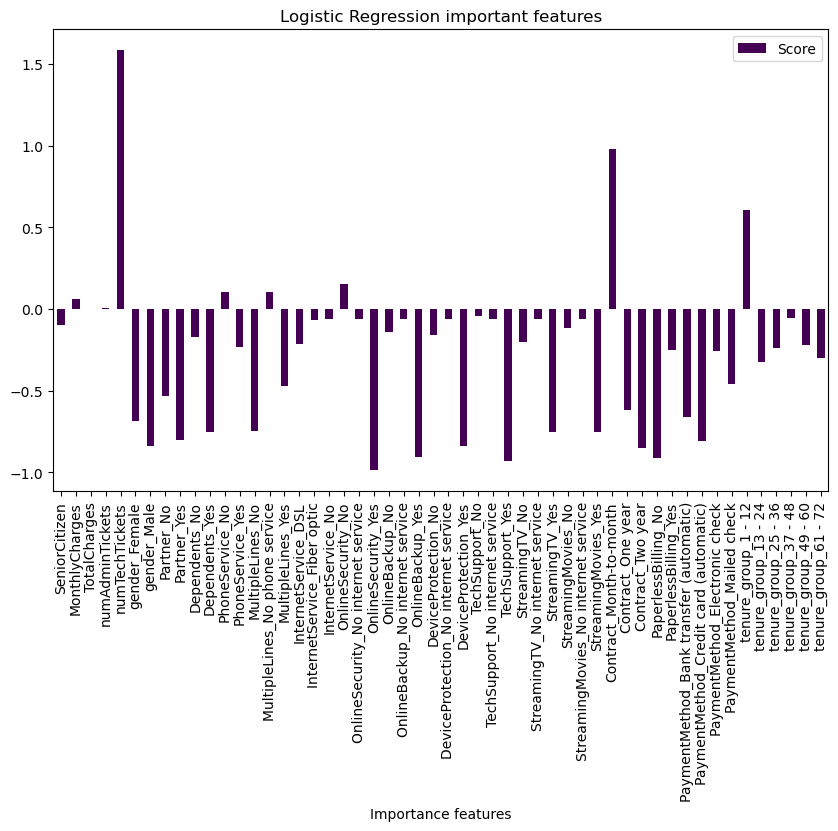

In [ ]:
feature_importance = pd.DataFrame({'Importance features': X_resampled.columns, 'Score': importance})
feature_importance.plot(x='Importance features', y='Score', kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Logistic Regression important features')

In [ ]:
#feature_importance.to_csv('Feature_importance.csv')

# 4. Conclusion and Recommendation

Conclusion:
It is clearly to focus on changing product variables. The customer who will have high risk of churning if they related to any below feature:
1. Number of technical Tickets: customer raise a lot of tickets on system to request for technical support. This number high is because of following reasons:
    - Product has problem
    - After sales service is not good and maybe take long time to response
    - Already fix the product technical issue but still not satisfy customer
2. Type of contract: Month - to - month. Because customer is free to cancel subscription in short term without paying register fee or product is not appealing to them anymore. 
3. Tenure below a year: customer who new and joined service/used product under a year.  

Recommendation:
- Connect with customer service team to deep dive in what exactly technical issue that customer need to support.
- If related to product, product team especially technical team should check out all features and improve.
- Connect with customer service team to pull more data about customer serivce, technical support feedback after each time to come up with suitable employee training program.
- Connect with sales and marketing team to discuss more cost to remind branding in the market, discount campaign, competitor analysis, etc.